# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# First unzip the file
from zipfile import ZipFile
from tqdm import tqdm

file_path = "traffic-signs-data.zip"
with ZipFile(file_path) as zipf:
    filename_pbar = tqdm(zipf.infolist(), unit="files")
    for file in filename_pbar:
        zipf.extract(file)
print("The data has been unziped")

100%|██████████| 3/3 [00:03<00:00,  1.09s/files]

The data has been unziped


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle

In [3]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
validation_file= "valid.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
print("The shape of training features: {}".format(X_train.shape))
print("The shape of training labels: {}".format(y_train.shape))
print("The shape of validation features: {}".format(X_valid.shape))
print("The shape of validation labels: {}".format(y_valid.shape))
print("The shape of test features: {}".format(X_test.shape))
print("The shape of test labels: {}".format(y_test.shape))

The shape of training features: (34799, 32, 32, 3)
The shape of training labels: (34799,)
The shape of validation features: (4410, 32, 32, 3)
The shape of validation labels: (4410,)
The shape of test features: (12630, 32, 32, 3)
The shape of test labels: (12630,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [5]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).shape[0]
print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [6]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

In [7]:
#index_arr contains the index of X_train for the first image of each class
index_arr = []
for i in range(43):
    for j in range(len(y_train)):
        if  y_train[j] == i:
            index_arr.append(j)
            break

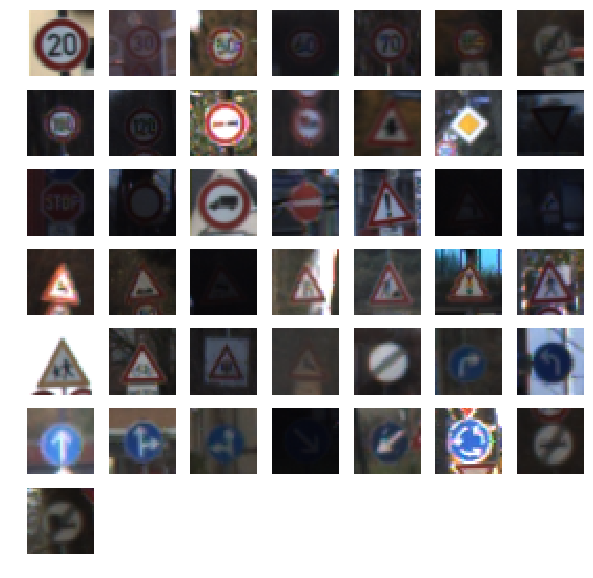

In [8]:
#First show one image for each class
fig = plt.figure(figsize=(10, 10))
for i in range(len(index_arr)):
    a = fig.add_subplot(7, 7, i+1)
    plt.axis("off")
    plt.imshow(X_train[index_arr[i]])

In [10]:
#Get the distribution of classes
#Get the distribution of train labels
def get_class_distribution(y):
    a = [0] * 43
    for i in range(y.shape[0]):
        a[y[i]] += 1
    return a

In [11]:
train_label_dis = get_class_distribution(y_train)
valid_label_dis = get_class_distribution(y_valid)
test_label_dis = get_class_distribution(y_test)

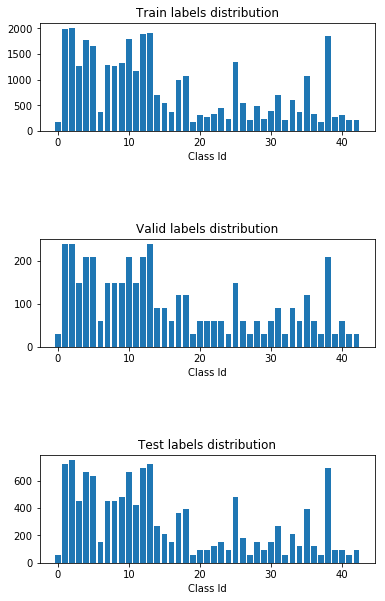

In [12]:
#Draw a histogram of count of each class for train, validation and test data set respectively
# data_label = ["train", "validation", "test"]
# data_src = [y_train, y_valid, y_test]
fig_1, (ax1, ax2, ax3) = plt.subplots(3, 1)
fig_1.subplots_adjust(top=2, hspace=1)
train_bar = ax1.bar(np.arange(43), train_label_dis)
ax1.set_title("Train labels distribution")
ax1.set_xlabel("Class Id")

valid_bar = ax2.bar(np.arange(43), valid_label_dis)
ax2.set_title("Valid labels distribution")
ax2.set_xlabel("Class Id")

test_bar = ax3.bar(np.arange(43), test_label_dis)
ax3.set_title("Test labels distribution")
ax3.set_xlabel("Class Id")

First, we can see from above that although the numbers of data are different accross different sets, the distributions of 3 datasets are much similar.

Second, some signs account for a large share of the total number of data such as the second and third sign. After refering to the sign names table, the second sign is ***speed limit(30km/h)*** and the third sign is ***speed limit(50km/h)***

### Generate fake data

Since the distribution of classes in training set is far from uniform, I'd like to generate some fake data by Translation, Rotation, Scaling and Shear.

In [13]:
import cv2
#apply affine transformation to data
def apply_affine(img, M):
    nrow, ncol, ch = img.shape
    return cv2.warpAffine(img, M, (ncol, nrow))

#apply translation
def random_translate(img, relative_move=0.1):
    h, w = img.shape[0:2]
    dx = np.random.uniform(-relative_move*w, relative_move*w)
    dy = np.random.uniform(-relative_move*h, relative_move*h)
    M = np.array([[1.0, 0.0, dx], [0.0, 1.0, dy]], dtype=np.float32)
    return apply_affine(img, M)

#apply rotate
def random_rotate(img, angle=5):
    theta = np.random.uniform(-angle * np.pi / 180, angle*np.pi / 180)
    c = np.cos(theta)
    s = np.sin(theta)
    M = np.array([[c, -s, 0.0], [s, c, 0.0]], dtype=np.float32)
    return apply_affine(img, M)

#apply scale
def random_scale(img, factor=0.05):
    sx = 1.0 + np.random.uniform(-factor, factor)
    sy = 1.0 + np.random.uniform(-factor, factor)
    M = np.array([[sx, 0.0, 0.0], [0.0, sy, 0.0]], dtype=np.float32)
    return apply_affine(img, M)

#apply shear
def random_shear(img, factor=0.05):
    sx = np.random.uniform(-factor, factor)
    sy = np.random.uniform(-factor, factor)
    M = np.array([[1.0, sx, 0.0], [sy, 1.0, 0.0]])
    return apply_affine(img, M)

def transform_img(img):
    a = np.random.randint(0, 4)
    if a == 0:
        return random_translate(img)
    elif a == 1:
        return random_rotate(img)
    elif a == 2:
        return random_scale(img)
    else:
        return random_shear(img)
    
#generate fake data
def generate_fake_data(X, y, old_distributions, expand_factor=10):
    fake_features = []
    fake_labels = []
    total_size = X.shape[0] * expand_factor
    n_classes = len(old_distributions)
    num_per_classes = int(np.ceil(total_size/n_classes))
    #generate fake images for each image in X
    for i in range(X.shape[0]):
        cur_num = old_distributions[y[i]]
        n_fake_image = int(np.ceil((num_per_classes-cur_num)/cur_num))
        for j in range(n_fake_image):
            fake_img = transform_img(X[i])
            fake_features.append(fake_img)
            fake_labels.append(y[i])
    return (np.array(fake_features), np.array(fake_labels))

#Extend the training set
def extend_training_set(X, y, old_distributions):
    X_fake, y_fake = generate_fake_data(X, y, old_distributions)
    return (np.concatenate((X, X_fake), axis=0), np.concatenate((y, y_fake), axis=0))

In [14]:
#Extend the training set
X_fake_train, y_fake_train = extend_training_set(X_train, y_train, train_label_dis)

In [15]:
#Store the extended training set
import os
fake_filepath = "fake_data.p"
if not os.path.isfile(fake_filepath):
    with open(fake_filepath, "wb") as f:
        pickle.dump({
            "features": X_fake_train,
            "labels": y_fake_train
        }, f)

In [16]:
#Load the extended training set
# Load pickled data
training_file = "fake_data.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)

X_train, y_train = train['features'], train['labels']

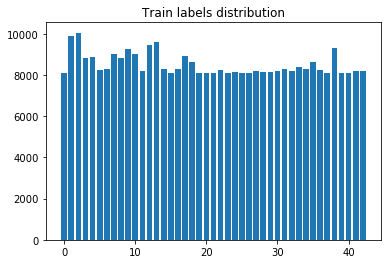

In [17]:
#Extended training set class distribution
extended_train_label_dis = get_class_distribution(y_train)
fig_2, ax_1 = plt.subplots()
extended_train_bar = ax_1.bar(np.arange(43), extended_train_label_dis)
ax_1.set_title("Train labels distribution")
ax1.set_xlabel("Class Id")

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### Normalize data

To avoid numerical instability, We first normalize our data.

In [18]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

#Convert the pixel with zero mean and equal variance
def normalize(x):
    return 0.1 + (0.9 - 0.1)* x / 255
train_labels = y_train
valid_labels = y_valid
test_labels = y_test

### Convert color image to gray image

After some training tests, I found that gray images will lead to better generalization accuracy. So here we convert the color images to gray images

In [19]:
#convert color image to grayscale
def color2gray(image):
    gray_image = [x[:, :, 0] * 0.2989 + x[:, :, 1] * 0.5870 + x[:, :, 2] * 0.114 for x in image]
    return np.array(gray_image)

### Preprocess the data

In [20]:
X_gray_train = color2gray(X_train)[:,:,:, None]
X_gray_valid = color2gray(X_valid)[:,:,:, None]
X_gray_test = color2gray(X_test)[:,:,:, None]

In [21]:
train_gray_features = normalize(X_gray_train)
valid_gray_features = normalize(X_gray_valid)
test_gray_features = normalize(X_gray_test)

### Model Architecture

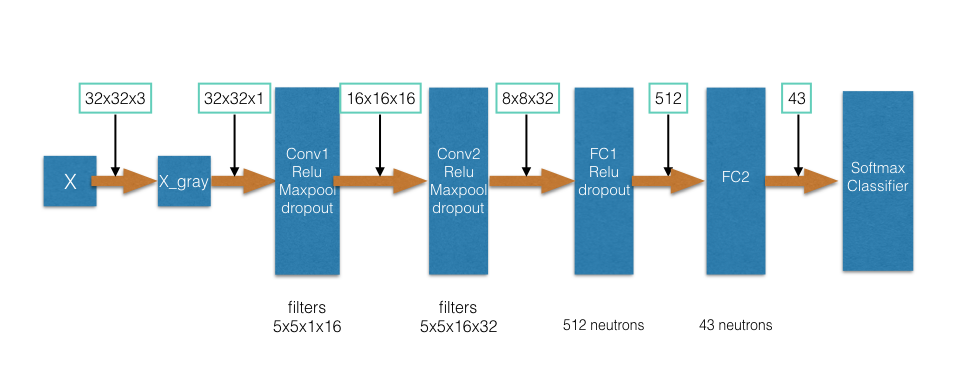

In [1]:
from IPython.display import Image
Image(filename='my_conv.png')

Here I use two convolutional layers and two fully connected layers. The first convolutional layer is of size 16x16x16 and the second convolutional layer is of size 8x8x32. The first fully connected layer contains 512 neutrons and the second contains 43 neutrons. 

In [22]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

#Define the hyperparameters of the net architecture
#set the hyperparameters for the network architecture
conv_filter_size = [5, 5] #2 convolutional layers, the filter size for each
conv_strides = [1, 1] #2 convolutional layers, the strides of filter for each
conv_padding = ["SAME", "SAME"] #2 convolutional layers, the filter padding for each
conv_output = [16, 32]  #2 convolutional layers, the output size for each
pooling_filter_size = [2, 2] # 2 pooling layers after convolutional layers, the filter size for each pooling layer
pooling_strides = [2, 2] # 2 pooling layers after convolutional layers, the strides for each pooling layer
pooling_padding = ["SAME", "SAME"] # 2 pooling layers after convolutional layers, the strides for each pooling layer
fully_output = [512, 43] # 3 fully connected layers, the output size for each

In [23]:
def network(x, keep_prob):
    #The first convolutional layer
    conv_weights_1 = tf.Variable(tf.truncated_normal([conv_filter_size[0], conv_filter_size[0], 1, conv_output[0]],
                                                     0.0, 0.1), name="conv_w_1")
    conv_bias_1 = tf.Variable(tf.zeros(conv_output[0]), name="conv_b_1")
    conv_layer_1 = tf.nn.conv2d(x, conv_weights_1, strides=[1, conv_strides[0], conv_strides[0], 1], padding=conv_padding[0])
    conv_layer_1 = tf.nn.bias_add(conv_layer_1, conv_bias_1)
    conv_layer_1 = tf.nn.relu(conv_layer_1)
    conv_layer_1 = tf.nn.max_pool(conv_layer_1, ksize=[1, pooling_filter_size[0], pooling_filter_size[0], 1],
                                strides=[1, pooling_strides[0], pooling_strides[0], 1], padding=pooling_padding[0])
    conv_layer_1 = tf.nn.dropout(conv_layer_1, keep_prob=keep_prob)
    
    #The second convolutional layer
    conv_weights_2 = tf.Variable(tf.truncated_normal([conv_filter_size[1], conv_filter_size[1], 
                                                      conv_output[0], conv_output[1]], 0.0, 0.1), name="conv_w_2")
    conv_bias_2 = tf.Variable(tf.zeros(conv_output[1]), name="conv_b_2")
    conv_layer_2 = tf.nn.conv2d(conv_layer_1, conv_weights_2, strides=[1, conv_strides[1], 
                                                        conv_strides[1], 1], padding=conv_padding[1])
    conv_layer_2 = tf.nn.bias_add(conv_layer_2, conv_bias_2)
    conv_layer_2 = tf.nn.relu(conv_layer_2)
    conv_layer_2 = tf.nn.max_pool(conv_layer_2, ksize=[1, pooling_filter_size[1], pooling_filter_size[1], 1],
                                strides=[1, pooling_strides[1], pooling_strides[1], 1], padding=pooling_padding[1])
    conv_layer_2 = tf.nn.dropout(conv_layer_2, keep_prob=keep_prob)
    #Third Convolutional layer
#     conv_weights_3 = tf.Variable(tf.truncated_normal([conv_filter_size[2], conv_filter_size[2], 
#                                                       conv_output[1], conv_output[2]], 0.0, 0.1))
#     conv_bias_3 = tf.Variable(tf.zeros(conv_output[2]))
#     conv_layer_3 = tf.nn.conv2d(conv_layer_2, conv_weights_3, strides=[1, conv_strides[2], 
#                                                         conv_strides[2], 1], padding=conv_padding[2])
#     conv_layer_3 = tf.nn.bias_add(conv_layer_3, conv_bias_3)
#     conv_layer_3 = tf.nn.relu(conv_layer_3)
#     conv_layer_3 = tf.nn.max_pool(conv_layer_3, ksize=[1, pooling_filter_size[2], pooling_filter_size[2], 1],
#                                 strides=[1, pooling_strides[2], pooling_strides[2], 1], padding=pooling_padding[2])
#     conv_layer_3 = tf.nn.dropout(conv_layer_3, keep_prob=keep_prob)
    #Flatten layer
    flatten_layer = flatten(conv_layer_2)
    
    #First fully connetected layer
    num_in_1 = flatten_layer.get_shape().as_list()[1] #the number of input feature
    fully_weights_1 = tf.Variable(tf.truncated_normal([num_in_1, fully_output[0]], 0.0, 0.1), name="fc_w_1")
    fully_bias_1 = tf.Variable(tf.zeros(fully_output[0]), name="fc_b_1")
    fully_layer_1 = tf.add(tf.matmul(flatten_layer, fully_weights_1), fully_bias_1)
    fully_layer_1 = tf.nn.relu(fully_layer_1)
    fully_layer_1 = tf.nn.dropout(fully_layer_1, keep_prob=keep_prob)
    
    #Second fully connected layer
    fully_weights_2 = tf.Variable(tf.truncated_normal([fully_output[0], fully_output[1]], 0.0, 0.1), name="fc_w_2")
    fully_bias_2 = tf.Variable(tf.zeros(fully_output[1]), name="fc_b_2")
    fully_layer_2 = tf.add(tf.matmul(fully_layer_1, fully_weights_2), fully_bias_2)
#     fully_layer_2 = tf.nn.relu(fully_layer_2)
    
    #Third fully connected layer
#     fully_weights_3 = tf.Variable(tf.truncated_normal([fully_output[1], fully_output[2]]))
#     fully_bias_3 = tf.Variable(tf.zeros(fully_output[2]))
#     fully_layer_3 = tf.add(tf.matmul(fully_layer_2, fully_weights_3), fully_bias_3)
    
    return fully_layer_2

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [24]:
#Define the epochs and batch size
epochs = 100
batch_size = 128

In [25]:
## Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

#get batches from features and labels input
def get_batch(features, labels, batch_size):
    n = features.shape[0]
    for start in range(0, n, batch_size):
        end = min(n, start+batch_size)
        yield features[start:end], labels[start:end]

In [26]:
#Define the loss, accuracy and optimizer of the network
learning_rate = 0.0001 # learning rate
x = tf.placeholder(tf.float32, [None, 32, 32, 1]) #input features
y = tf.placeholder(tf.int32, [None]) #input labels
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43) #one hot encode for input labels
logits = network(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
loss = tf.reduce_mean(cross_entropy)
#Use adam optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

In [27]:
def evaluate(features, labels):
    total_acc = 0
    sess = tf.get_default_session()
    co_pred = []
    for batch_features, batch_labels in get_batch(features, labels, batch_size):
        temp_acc, corr_pred = sess.run([accuracy, correct_pred], feed_dict={x: batch_features, y: batch_labels, keep_prob:1.0})
        total_acc += temp_acc * batch_features.shape[0]
        co_pred += list(corr_pred)
    return total_acc/features.shape[0], co_pred

In [40]:
#Train the neural network
saver = tf.train.Saver()
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    for epoch in range(epochs):
        train_acc = 0
        train_gray_features, train_labels = shuffle(train_gray_features, train_labels)
        for batch_features, batch_labels in get_batch(train_gray_features, train_labels, batch_size):
            _, acc = sess.run([optimizer, accuracy], feed_dict={x: batch_features, y:batch_labels, keep_prob:0.5})
            train_acc += acc * batch_features.shape[0]
        train_acc = train_acc / train_gray_features.shape[0]
        valid_acc, co_pred = evaluate(valid_gray_features, valid_labels)
        print("Epoch {}, train accuracy: {}, validation accuracy: {}".format(epoch+1, train_acc, valid_acc))
    saver.save(sess, "model_1")
    print("Model saved")
valid_pred = co_pred

Epoch 1, train accuracy: 0.027961237298593195, validation accuracy: 0.047619047619047616
Epoch 2, train accuracy: 0.038894026363615386, validation accuracy: 0.07346938775510205
Epoch 3, train accuracy: 0.09198481009985507, validation accuracy: 0.25510204081632654
Epoch 4, train accuracy: 0.27404201298890624, validation accuracy: 0.49138321984652217
Epoch 5, train accuracy: 0.49809852643485863, validation accuracy: 0.6947845804718347
Epoch 6, train accuracy: 0.6771161075370322, validation accuracy: 0.7979591830787746
Epoch 7, train accuracy: 0.7838886365848339, validation accuracy: 0.8689342396870222
Epoch 8, train accuracy: 0.8452118433174183, validation accuracy: 0.9154195012689448
Epoch 9, train accuracy: 0.8843657833247082, validation accuracy: 0.9360544213362021
Epoch 10, train accuracy: 0.9096813732326374, validation accuracy: 0.9600907032181617
Epoch 11, train accuracy: 0.9274731468208657, validation accuracy: 0.967346939045826
Epoch 12, train accuracy: 0.9395851230896346, valida

Epoch 97, train accuracy: 0.9975923787844796, validation accuracy: 0.9802721088435374
Epoch 98, train accuracy: 0.9974856773897008, validation accuracy: 0.981859410430839
Epoch 99, train accuracy: 0.9975568116528867, validation accuracy: 0.9848072562358277
Epoch 100, train accuracy: 0.9975239804544932, validation accuracy: 0.9820861678004535
Model saved


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Test on the test data set

In [44]:
with tf.Session() as sess:
    tf.train.import_meta_graph("model_1.meta")
    saver.restore(sess, "./model_1")
    test_acc, _ = evaluate(test_gray_features, test_labels)
    print("Test accuracy: {}".format(test_acc))

INFO:tensorflow:Restoring parameters from ./model_1
Test accuracy: 0.9802058589902078


### Load and Output the Images

New images are listed below. I think it would not be difficult to classify the these images with our model.

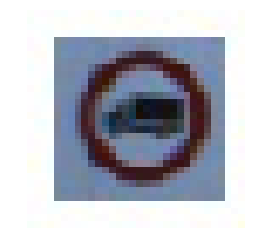

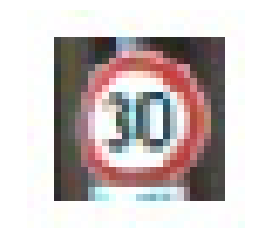

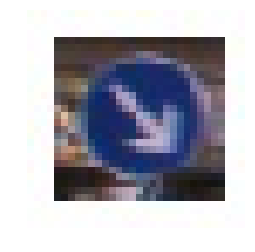

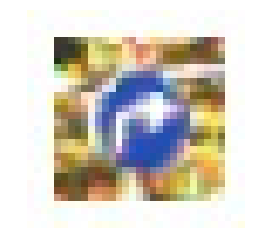

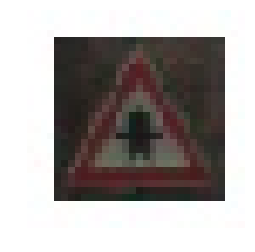

In [49]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
new_images = []
for j in range(5):
    file_path = "./additional_images/figure_" + str(j) + ".jpg"
    image = mpimg.imread(file_path)
    new_images.append(image)
    fig = plt.figure()
    plt.axis("off")
    plt.imshow(image)
    plt.show()

In [72]:
#new_image_labels is the correct labels for each image
new_image_labels = np.array([16, 1, 38, 33, 11], dtype=np.float32)
new_images = np.array(new_images)

In [58]:
#color2gray and normalize
new_gray_images = color2gray(new_images)[:, :, :, None]
new_gray_features = normalize(new_gray_images)

In [64]:
new_gray_features.shape

(5, 32, 32, 1)

### Predict the Sign Type  for Each Image

In [70]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
pred = tf.argmax(logits, axis=1)
pred_res = []
with tf.Session() as sess:
    tf.train.import_meta_graph("model_1.meta")
    saver.restore(sess, "./model_1")
    pred_index = sess.run(pred, feed_dict={x: new_gray_features, y:new_image_labels, keep_prob:1.0})

INFO:tensorflow:Restoring parameters from ./model_1
[16  1 38 33 11]


In [75]:
#To see whether the predictions are the same as the true labels
pred_index == new_image_labels

array([ True,  True,  True,  True,  True], dtype=bool)

So we can see that our model correctly predict the labels for all 5 images.

### Analyze Performance

In [76]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    tf.train.import_meta_graph("model_1.meta")
    saver.restore(sess, "./model_1")
    new_acc = sess.run(accuracy, feed_dict={x: new_gray_features, y:new_image_labels, keep_prob:1.0})

INFO:tensorflow:Restoring parameters from ./model_1


In [78]:
#This is the accuracy for these new images
new_acc

1.0

We can see that the performance on these 5 images is better than on the test set.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [80]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
soft_max_value = tf.nn.softmax(logits)
with tf.Session() as sess:
    tf.train.import_meta_graph("model_1.meta")
    saver.restore(sess, "./model_1")
    soft_max_value = sess.run(soft_max_value, feed_dict={x: new_gray_features, y:new_image_labels, keep_prob:1.0})
    rank_softmax = sess.run(tf.nn.top_k(soft_max_value, k=3))

INFO:tensorflow:Restoring parameters from ./model_1


In [81]:
rank_softmax

TopKV2(values=array([[  1.00000000e+00,   3.84203845e-14,   1.38301905e-14],
       [  1.00000000e+00,   1.95372711e-11,   1.29389327e-12],
       [  9.94133174e-01,   2.52591586e-03,   1.89370720e-03],
       [  9.95798886e-01,   1.05653389e-03,   1.02396228e-03],
       [  9.99999881e-01,   7.48756932e-08,   1.46629615e-08]], dtype=float32), indices=array([[16,  9, 10],
       [ 1,  0,  2],
       [38,  5, 40],
       [33, 41, 36],
       [11, 23, 30]], dtype=int32))

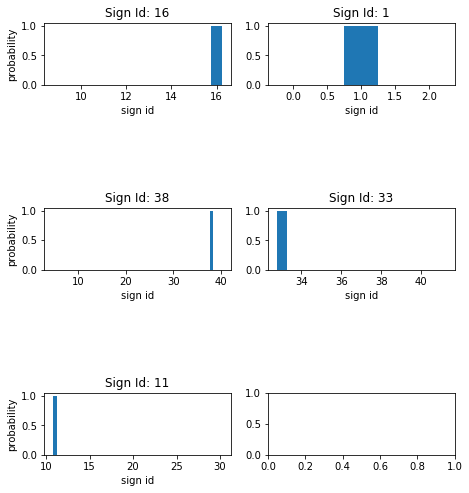

In [128]:
fig1, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)
fig1.subplots_adjust(left=0.05, right=1, top=2, bottom=0.5, hspace=2)
ax1.set_title("Sign Id: 16")
ax1.set_xlabel("sign id")
ax1.set_ylabel("probability")
bar_1 = ax1.bar(rank_softmax.indices[0], rank_softmax.values[0], width=0.5)
ax2.set_title("Sign Id: 1")
ax2.set_xlabel("sign id")
bar_2 = ax2.bar(rank_softmax.indices[1], rank_softmax.values[1], width=0.5)
ax3.set_title("Sign Id: 38")
ax3.set_xlabel("sign id")
ax3.set_ylabel("probability")
bar_3 = ax3.bar(rank_softmax.indices[2], rank_softmax.values[2], width=0.5)
ax4.set_title("Sign Id: 33")
ax4.set_xlabel("sign id")
bar_4 = ax4.bar(rank_softmax.indices[3], rank_softmax.values[3], width=0.5)
ax5.set_title("Sign Id: 11")
ax5.set_xlabel("sign id")
ax5.set_ylabel("probability")
bar_5 = ax5.bar(rank_softmax.indices[4], rank_softmax.values[4], width=0.5)
plt.show()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [129]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [130]:
outputFeatureMap(new_gray_features[0], conv_layer_1)

NameError: name 'conv_layer_1' is not defined